In [2]:
#dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn.apionly as sns

C:\Users\randy\Anaconda3\envs\pythonData\lib\site-packages\seaborn\apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
terror_csv ="C:/Users/randy/Desktop/Group_project/Terrorism.csv"
df=pd.read_csv(terror_csv, encoding = "Latin")



C:\Users\randy\Anaconda3\envs\pythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,63,79,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
new_df = df[["iyear","imonth", "country_txt", "region_txt", "city", "attacktype1_txt", "targtype1_txt","nkill","nwound"]]
new_df.head()

,iyear,imonth,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,nkill,nwound
0,2012,1,Pakistan,South Asia,Quetta,Bombing/Explosion,Business,0.0,12.0
1,2012,1,Kenya,Sub-Saharan Africa,Garissa,Armed Assault,Business,3.0,14.0
2,2012,1,Pakistan,South Asia,Sui,Bombing/Explosion,Military,4.0,3.0
3,2012,1,Kenya,Sub-Saharan Africa,Garissa,Armed Assault,Business,2.0,14.0
4,2012,1,Pakistan,South Asia,Peer Chhatta,Hostage Taking (Kidnapping),Private Citizens & Property,0.0,0.0


In [5]:
df1=new_df.rename(index=str, columns={"iyear": "Year","imonth": "Month" , "country_txt": "Country", "region_txt": "Region" , "city": "City", "attacktype1_txt": "Attack Type" , "targtype1_txt": "Attack Type", "nkill": "Number Killed", "nwound": "Number Wounded"})
df1['Year'] = df1['Year'].astype(str)
df1['Month'] = df1['Month'].astype(str)
df1.head()

,Year,Month,Country,Region,City,Attack Type,Attack Type,Number Killed,Number Wounded
0,2012,1,Pakistan,South Asia,Quetta,Bombing/Explosion,Business,0.0,12.0
1,2012,1,Kenya,Sub-Saharan Africa,Garissa,Armed Assault,Business,3.0,14.0
2,2012,1,Pakistan,South Asia,Sui,Bombing/Explosion,Military,4.0,3.0
3,2012,1,Kenya,Sub-Saharan Africa,Garissa,Armed Assault,Business,2.0,14.0
4,2012,1,Pakistan,South Asia,Peer Chhatta,Hostage Taking (Kidnapping),Private Citizens & Property,0.0,0.0


In [6]:
worldwide=df1.groupby(["Year"]).count()
worldwidecount=worldwide[["Country"]]
renamed_worldwidecount= worldwidecount.rename(columns={"Country": "Number of Attacks"})
renamed_worldwidecount

,Number of Attacks
Year,
2012,8522
2013,12036
2014,16903
2015,14965
2016,13587
2017,10900


<IPython.core.display.Javascript object>


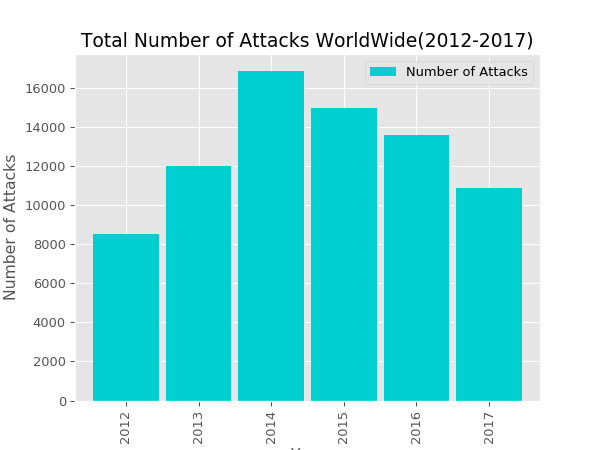

In [11]:
#Plot worldwide attacks
worldwidechart = renamed_worldwidecount.plot(kind='bar', width=.9, color = ["darkturquoise"])

worldwidechart.set_xlabel("Year")
worldwidechart.set_ylabel("Number of Attacks")
worldwidechart.set_title("Total Number of Attacks WorldWide(2012-2017)")

worldwidechart

In [19]:
#Group Dataframe by Region
terror = df1.groupby(["Region"]).count()
terror.head()

,Year,Month,Country,City,Attack Type,Attack Type,Number Killed,Number Wounded
Region,,,,,,,,
Australasia & Oceania,46,46,46,46,46,46,46,45
Central America & Caribbean,28,28,28,28,28,28,28,27
Central Asia,62,62,62,62,62,62,62,62
East Asia,105,105,105,105,105,105,100,98
Eastern Europe,2228,2228,2228,2228,2228,2228,2128,2098


In [33]:
#Break up dataFrames by Year
FY2012DF = df1.loc[df1["Year"] == "2012", :]
FY2013DF = df1.loc[df1["Year"] == "2013", :]
FY2014DF = df1.loc[df1["Year"] == "2014", :]
FY2015DF = df1.loc[df1["Year"] == "2015", :]
FY2016DF = df1.loc[df1["Year"] == "2016", :]
FY2017DF = df1.loc[df1["Year"] == "2017", :]


#Group by regions and count how many attacks that year
Region2012 = FY2012DF.groupby(["Region"]).count()
Region2013 = FY2013DF.groupby(["Region"]).count()
Region2014 = FY2014DF.groupby(["Region"]).count()
Region2015 = FY2015DF.groupby(["Region"]).count()
Region2016 = FY2016DF.groupby(["Region"]).count()
Region2017 = FY2017DF.groupby(["Region"]).count()

#Pull out one column to plot
chart2012 = Region2012[["Year"]]
chart2013 = Region2013[["Year"]]
chart2014 = Region2014[["Year"]]
chart2015 = Region2015[["Year"]]
chart2016 = Region2016[["Year"]]
chart2017 = Region2017[["Year"]]

#Merging the dataFrames on Region
combined = pd.merge(chart2012, chart2013, on="Region")
combinedRename = combined.rename(columns = {"Year_x":"2012", "Year_y": "2013"})

combined2 = pd.merge(combinedRename, chart2014, on="Region")
combined2Rename = combined2.rename(columns = {"Year":"2014"})

combined3 = pd.merge(combined2Rename, chart2015, on="Region")
combined3Rename = combined3.rename(columns = {"Year":"2015"})

combined4 = pd.merge(combined3Rename, chart2016, on="Region")
combined4Rename = combined4.rename(columns = {"Year":"2016"})

combined5 = pd.merge(combined4Rename, chart2017, on="Region")
combined5Rename = combined5.rename(columns = {"Year":"2017"})
combined5Rename

,2012,2013,2014,2015,2016,2017
Region,,,,,,
Central America & Caribbean,1,14,5,1,3,4
Central Asia,12,7,9,10,17,7
East Asia,4,15,43,28,8,7
Eastern Europe,173,165,962,684,134,110
Middle East & North Africa,2409,4560,6939,6036,6115,3780
North America,39,32,37,62,75,97
South America,133,182,283,176,159,172
South Asia,3803,4612,4998,4585,3639,3430
Southeast Asia,587,1188,1082,1072,1077,1020
